# Classification by a Neural Network using Keras
### Questions
What is a neural network?

How do I compose a Neural Network using Keras?

How do I train this network on a dataset

How do I get insight into learning process

How do I measure the performance of the network

### Objectives
Use the deep learning workflow to structure the notebook

Explore the dataset using pandas and seaborn

Use one-hot encoding to prepare data for classification in Keras

Describe a fully connected layer

Implement a fully connected layer with Keras

Use Keras to train a small fully connected network on prepared data

Plot the loss curve of the training process

Use a confusion matrix to measure the trained networks’ performance on a test set

1. Formulate / Outline the problem
2. Identify inputs and outputs
2. Prepare data
3. Choose a pretrained model or start building architecture from scratch
4. Choose a loss function and optimizer
5. Train the model
6. Perform a Prediction/Classification
7. Measure performance
8. Tune hyperparameters
9. Save model

## 1. Formulate the problem

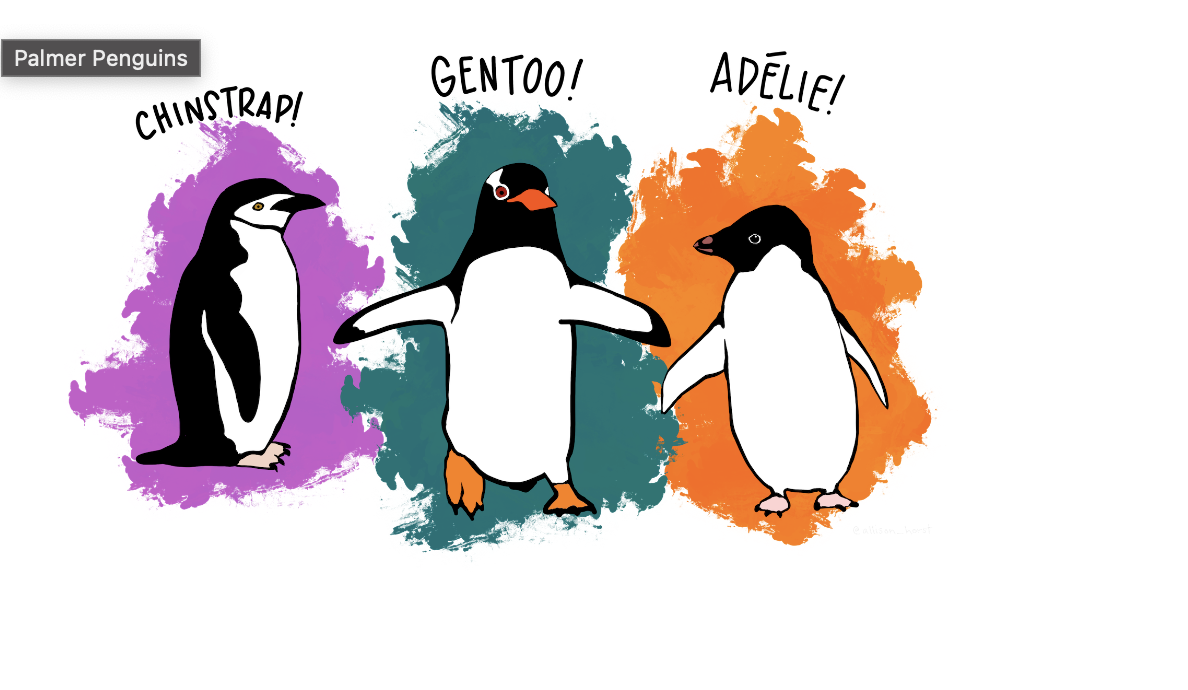

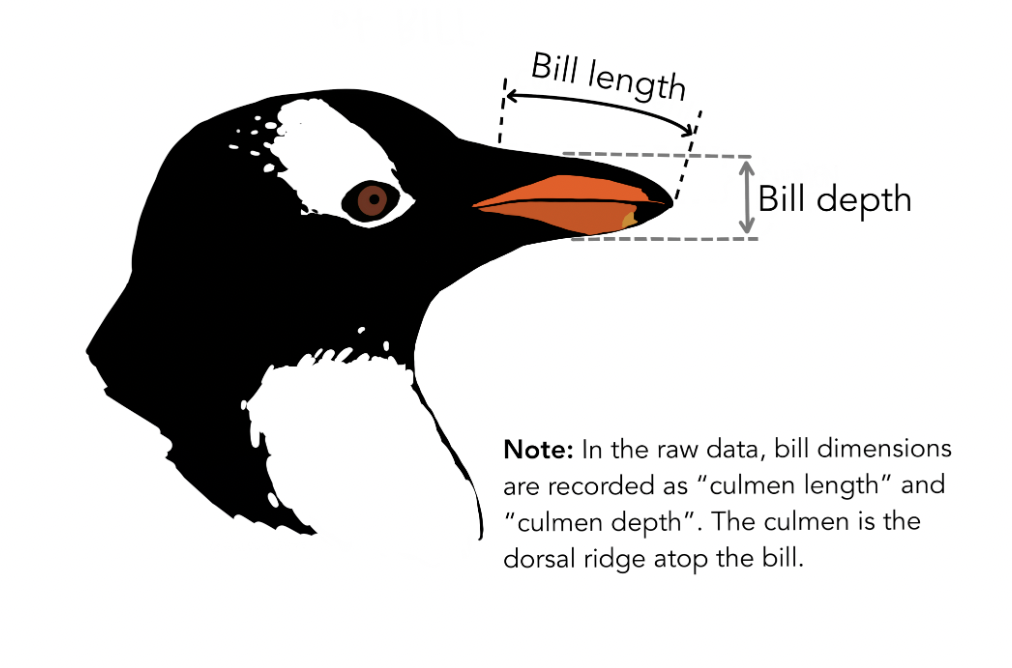

Goal: Predict the penguins' species using the attributes available in the dataset

## 2. Identify inputs and outputs
input: Different features of the bill
output: which species

Loading the dataset

In [1]:
import seaborn as sns

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
type(penguins)

pandas.core.frame.DataFrame

### Exercise: Inspect the penguins dataset.
1. What are the different features called in the dataframe?
2. Are the target classes of the dataset stored as numbers or strings?
3. How many samples does this dataset have?

In [4]:
penguins.columns[1:]

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [5]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [7]:
isinstance(penguins.species[0], str)

True

In [8]:
len(penguins)

344

### Visualization

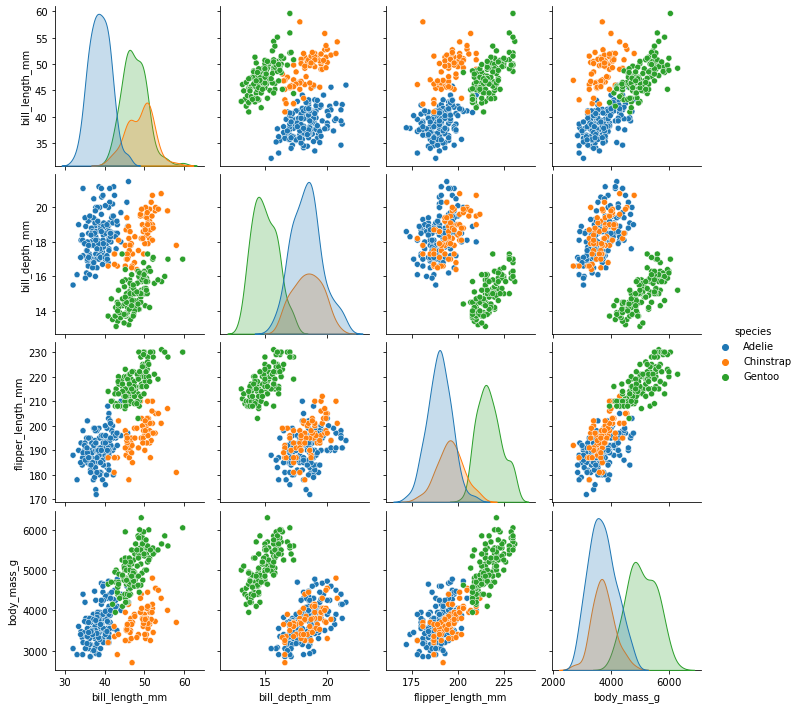

In [9]:
sns.pairplot(penguins, hue='species')

## Exercies: Pairplot

Take a look at the pairplot we created. Consider the following questions:

* Is there any class that is easily distinguishable from the others?
* Which combination of attributes shows the best separation for all 3 class labels at once?


## 3. Prepare data

In [10]:
penguins['species'] = penguins['species'].astype('category')

In [11]:
penguins_filtered = penguins.drop(columns=['island', 'sex']).dropna()

In [12]:
penguins_features = penguins_filtered.drop(columns=['species'])

In [13]:
penguins_features.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [14]:
import pandas as pd

In [15]:
target = pd.get_dummies(penguins_filtered['species'])
target.head()

,Adelie,Chinstrap,Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0


### Split the dataset

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(penguins_features, target,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    shuffle=True,
                                                    stratify=target)

### Exercise: Training and Test sets

Take a look at the training and test set we created.
- How many samples do the training and test sets have?
- Are the classes in the training set well balanced?


In [18]:
len(X_train), len(X_test)

(273, 69)

In [19]:
y_train.mean()

Adelie       0.443223
Chinstrap    0.197802
Gentoo       0.358974
dtype: float64

In [20]:
y_test.mean()

Adelie       0.434783
Chinstrap    0.202899
Gentoo       0.362319
dtype: float64

## 4. Build an architecture from scratch or choose a pretrained model

In [21]:
from tensorflow import keras

In [22]:
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

In [23]:
inputs = keras.Input(shape=X_train.shape[1])

In [24]:
inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'input_1')>

In [25]:
hidden_layer = keras.layers.Dense(10, activation="relu")(inputs)

In [26]:
output_layer = keras.layers.Dense(3, activation='softmax')(hidden_layer)

In [27]:
model = keras.Model(inputs=inputs, outputs=output_layer)

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


## Create the neural network

With the code snippets above, we defined a Keras model with 1 hidden layer with
10 neurons and an output layer with 3 neurons.

* How many parameters does the resulting model have?
* What happens to the number of parameters if we increase or decrease the number of neurons
in the hidden layer?


## 5. Choose a loss function and optimizer

In [29]:
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy())

## 6. Train model
Epoch = 1 iteration through all the training data
100 training samples
5 batch size
20 batches

In [30]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 542us/step - loss: 1437.0835
Epoch 2/100
9/9 [==============================] - 0s 492us/step - loss: 1342.4806
Epoch 3/100
9/9 [==============================] - 0s 573us/step - loss: 1250.2441
Epoch 4/100
9/9 [==============================] - 0s 518us/step - loss: 1161.1310
Epoch 5/100
9/9 [==============================] - 0s 519us/step - loss: 1072.3634
Epoch 6/100
9/9 [==============================] - 0s 499us/step - loss: 986.2888
Epoch 7/100
9/9 [==============================] - 0s 512us/step - loss: 899.5410
Epoch 8/100
9/9 [==============================] - 0s 505us/step - loss: 814.8821
Epoch 9/100
1/9 [==>...........................] - ETA: 0s - loss: 787.8511

2022-09-26 15:10:56.816502: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9/9 [==============================] - 0s 538us/step - loss: 730.5246
Epoch 10/100
9/9 [==============================] - 0s 489us/step - loss: 646.4477
Epoch 11/100
9/9 [==============================] - 0s 438us/step - loss: 563.8450
Epoch 12/100
9/9 [==============================] - 0s 446us/step - loss: 480.1230
Epoch 13/100
9/9 [==============================] - 0s 562us/step - loss: 399.4722
Epoch 14/100
9/9 [==============================] - 0s 434us/step - loss: 366.3512
Epoch 15/100
9/9 [==============================] - 0s 422us/step - loss: 330.7923
Epoch 16/100
9/9 [==============================] - 0s 493us/step - loss: 301.9053
Epoch 17/100
9/9 [==============================] - 0s 460us/step - loss: 275.2233
Epoch 18/100
9/9 [==============================] - 0s 444us/step - loss: 250.4420
Epoch 19/100
9/9 [==============================] - 0s 522us/step - loss: 225.2122
Epoch 20/100
9/9 [==============================] - 0s 474us/step - loss: 200.5178
Epoch 21/100
9/9 

<AxesSubplot:>

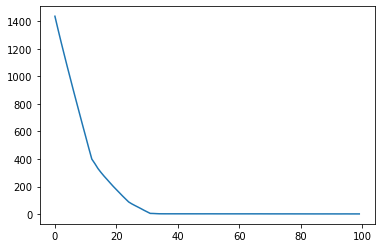

In [31]:
sns.lineplot(x=history.epoch, y=history.history["loss"])

### Exercise: (line 338) Looking at the training curve we have just made.
1. How does the training progress?
* Does the training loss increase or decrease?
* Does it change fast or slowly?
* Is the graph look very jittery?
2. Do you think the resulting trained network will work well on the test set?


In [32]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 790us/step


In [33]:
prediction = pd.DataFrame(y_pred, columns=target.columns)

In [34]:
prediction.head()

,Adelie,Chinstrap,Gentoo
0,0.086917,0.266622,0.646461
1,0.632433,0.022720,0.344846
2,0.443350,0.051871,0.504779
3,0.435130,0.047177,0.517693
4,0.182717,0.181500,0.635783


In [35]:
predicted_species = prediction.idxmax(axis="columns")
predicted_species

0     Gentoo
1     Adelie
2     Gentoo
3     Gentoo
4     Gentoo
       ...  
64    Adelie
65    Adelie
66    Adelie
67    Gentoo
68    Gentoo
Length: 69, dtype: object

## 8. Measuring performance

<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

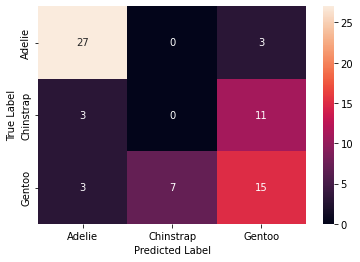

In [36]:
from sklearn.metrics import confusion_matrix

true_species = y_test.idxmax(axis="columns")

matrix = confusion_matrix(true_species, predicted_species)

# Convert to a pandas dataframe
confusion_df = pd.DataFrame(matrix, index=y_test.columns.values, columns=y_test.columns.values)

# Set the names of the x and y axis, this helps with the readability of the heatmap.
confusion_df.index.name = 'True Label'
confusion_df.columns.name = 'Predicted Label'

sns.heatmap(confusion_df, annot=True)

Measure the performance of the neural network you trained and
visualize a confusion matrix.

- Did the neural network perform well on the test set?
- Did you expect this from the training loss you saw?
- What could we do to improve the performance?

## 9. Hyperparamter search

## 10. Save and share the model

In [37]:
model.save('svens_cool_model')

INFO:tensorflow:Assets written to: svens_cool_model/assets


In [38]:
pretrained_model = keras.models.load_model('svens_cool_model')

In [39]:
y_pretrained_pred = pretrained_model.predict(X_test)

3/3 [==============================] - 0s 874us/step


In [40]:
y_pretrained_pred

array([[8.69168416e-02, 2.66622037e-01, 6.46461189e-01],
       [6.32433474e-01, 2.27201134e-02, 3.44846457e-01],
       [4.43350077e-01, 5.18710241e-02, 5.04778862e-01],
       [4.35130268e-01, 4.71769199e-02, 5.17692804e-01],
       [1.82717130e-01, 1.81500047e-01, 6.35782778e-01],
       [4.14471418e-01, 5.03563322e-02, 5.35172284e-01],
       [6.45480812e-01, 2.05767993e-02, 3.33942354e-01],
       [8.91451836e-01, 2.59476504e-03, 1.05953373e-01],
       [1.84332550e-01, 1.31018862e-01, 6.84648633e-01],
       [1.05507016e-01, 2.13540182e-01, 6.80952787e-01],
       [1.56151131e-01, 1.40366510e-01, 7.03482389e-01],
       [8.08102638e-02, 2.58307904e-01, 6.60881758e-01],
       [9.73845840e-01, 1.86241159e-04, 2.59679575e-02],
       [9.94279027e-01, 1.28972142e-05, 5.70804672e-03],
       [9.68915284e-01, 2.59021792e-04, 3.08256466e-02],
       [9.82103869e-02, 3.06696951e-01, 5.95092714e-01],
       [9.74891484e-01, 1.68762257e-04, 2.49397568e-02],
       [9.60224211e-01, 3.98852

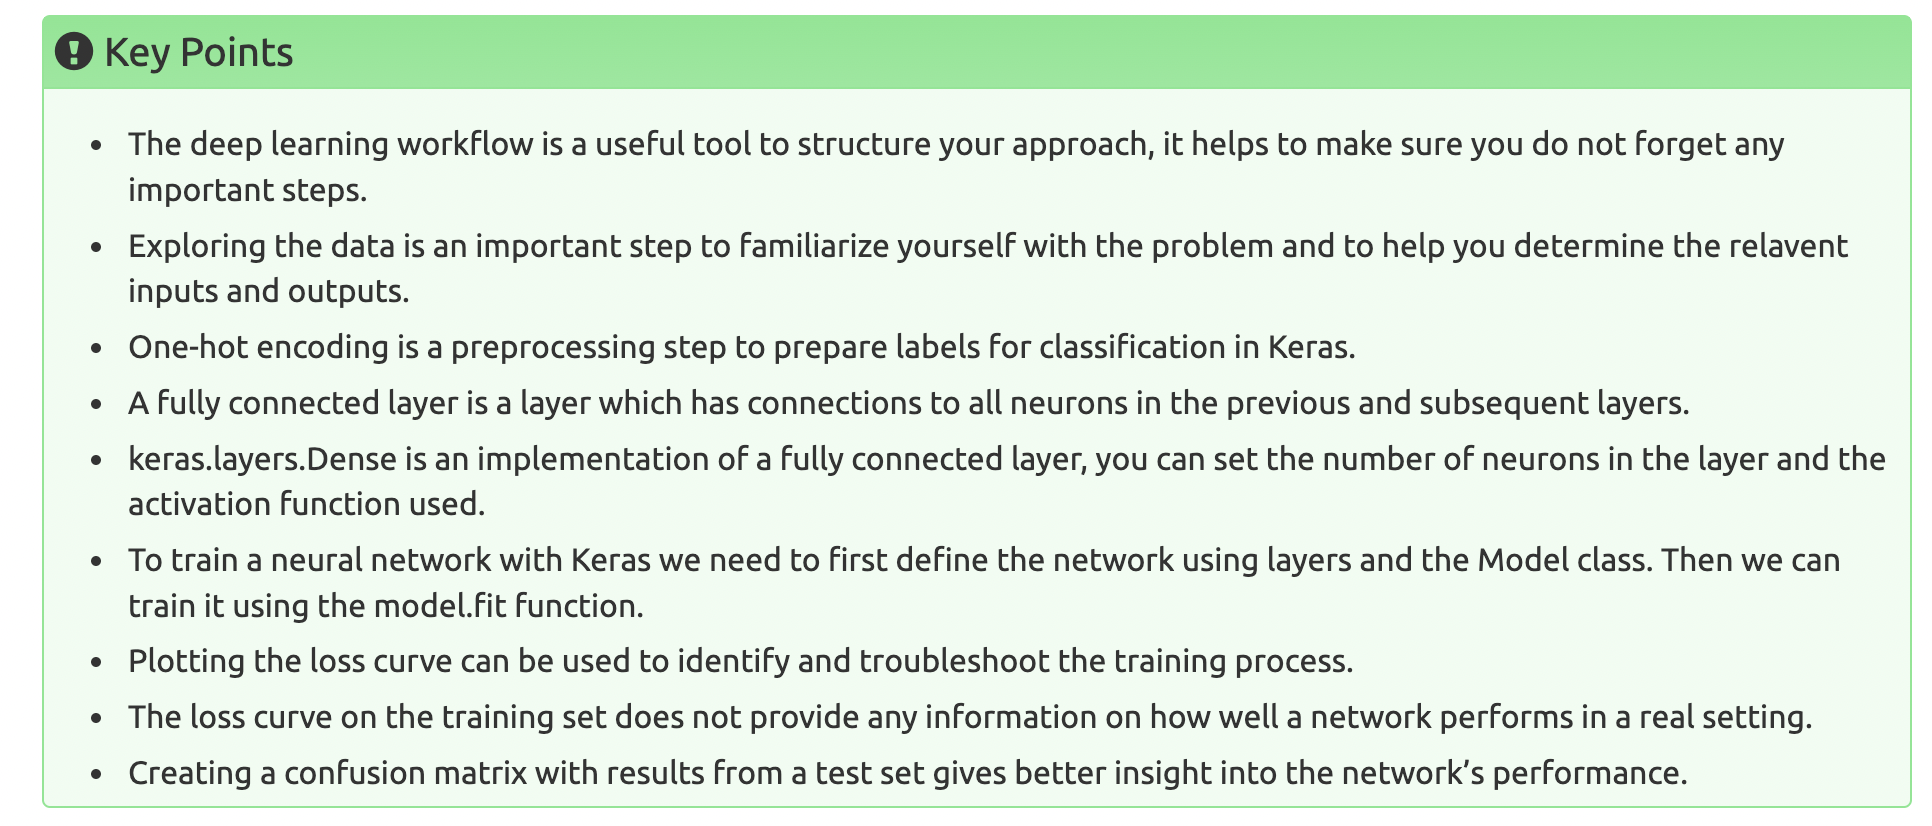